Fase 1 -Estructurar el conjunto de datos

-Adquisicion de datos
-Exploracion de datos
-Preprocesamiento

Reconocer los datos de analisis para el caso de estudio, si se trata de aprendizaje sobre imágenes(Clasificación),
aprendizaje sobre texto(Clasificación),sobre variables continuas y discretas(regresión o clasificación).


In [2]:
import pandas as pd

data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.sample(5)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
89,90,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,None
336,337,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
332,333,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
47,48,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
77,78,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None


In [3]:
data["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [4]:
data["Sleep Disorder"] = data["Sleep Disorder"].map({
    'None': 1,
    'Sleep Apnea':2, 
    'Insomnia':3
})
data["Sleep Disorder"]

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

In [5]:
estres = list(data["Stress Level"])
calidad = list(data["Quality of Sleep"])
duracion = list(data["Sleep Duration"])

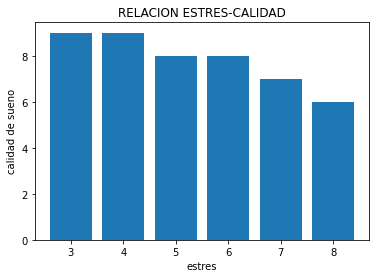

In [6]:
import matplotlib.pyplot as plt

plt.bar(estres, calidad)
plt.title("RELACION ESTRES-CALIDAD")
plt.xlabel("estres")
plt.ylabel("calidad de sueno")
plt.show()

In [7]:
data["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [8]:
data["count"] = 1
counts = data.groupby("Occupation").count()["count"]
carreras = list(counts.index)
conteo_carrera = list(counts.values)

print(carreras)
print(conteo_carrera)

['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer', 'Teacher']
[37, 71, 63, 47, 1, 73, 2, 32, 4, 4, 40]


# Fase 2 - Modelo de aprendizaje

-Conjunto de entrenamiento
-Conjunto de pruebas
-Modelo de Clasificación/Regresión
-Ajuste/Entrenamiento
-Pruebas de validación


In [9]:
x1 = data["Sleep Duration"]
x2 = data["Quality of Sleep"]
x3 = data["Stress Level"]

In [10]:
import numpy as np
X = np.array([
    x1,
    x2,
    x3
]).T
X

array([[6.1, 6. , 6. ],
       [6.2, 6. , 8. ],
       [6.2, 6. , 8. ],
       ...,
       [8.1, 9. , 3. ],
       [8.1, 9. , 3. ],
       [8.1, 9. , 3. ]])

In [11]:
Y = data["Occupation"].values
Y

array(['Software Engineer', 'Doctor', 'Doctor', 'Sales Representative',
       'Sales Representative', 'Software Engineer', 'Teacher', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Nurse', 'Doctor', 'Nurse', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Nurse', 'Nurse', 'Nurse', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Engineer', 'Engineer',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Accountant', 'Doctor', 'Scientist',
       'Scientist', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',
       'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Scientist',
       'Scientist', 'Teacher'

In [12]:
X.shape, Y.shape

((374, 3), (374,))

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4)
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((224, 3), (150, 3), (224,), (150,))

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.7733333333333333

In [15]:
Y_predict = clf.predict(X_test)
Y_predict

array(['Doctor', 'Teacher', 'Doctor', 'Doctor', 'Teacher', 'Lawyer',
       'Nurse', 'Teacher', 'Teacher', 'Doctor', 'Lawyer', 'Accountant',
       'Salesperson', 'Doctor', 'Doctor', 'Accountant', 'Engineer',
       'Doctor', 'Nurse', 'Accountant', 'Doctor', 'Scientist', 'Engineer',
       'Salesperson', 'Teacher', 'Engineer', 'Doctor', 'Engineer',
       'Accountant', 'Engineer', 'Engineer', 'Nurse', 'Doctor', 'Doctor',
       'Engineer', 'Accountant', 'Teacher', 'Engineer', 'Engineer',
       'Accountant', 'Doctor', 'Nurse', 'Salesperson', 'Nurse', 'Nurse',
       'Doctor', 'Teacher', 'Teacher', 'Engineer', 'Nurse', 'Lawyer',
       'Doctor', 'Doctor', 'Doctor', 'Nurse', 'Salesperson', 'Doctor',
       'Nurse', 'Accountant', 'Lawyer', 'Nurse', 'Teacher',
       'Sales Representative', 'Salesperson', 'Sales Representative',
       'Accountant', 'Teacher', 'Engineer', 'Lawyer', 'Engineer',
       'Doctor', 'Accountant', 'Nurse', 'Engineer',
       'Sales Representative', 'Accountant', 

Fase 3 - Reportes y resultados

-Validacion de Aprendizaje
-Generar graficas de desempeño
-Reporte de metricas

In [16]:

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predict)

0.7733333333333333

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict))

                      precision    recall  f1-score   support

          Accountant       0.65      0.87      0.74        15
              Doctor       0.74      0.82      0.78        28
            Engineer       0.83      0.80      0.82        25
              Lawyer       1.00      0.73      0.85        15
             Manager       0.00      0.00      0.00         0
               Nurse       0.68      0.72      0.70        32
Sales Representative       0.00      0.00      0.00         0
         Salesperson       1.00      1.00      1.00        12
           Scientist       1.00      0.33      0.50         3
   Software Engineer       0.00      0.00      0.00         2
             Teacher       1.00      0.72      0.84        18

            accuracy                           0.77       150
           macro avg       0.63      0.55      0.57       150
        weighted avg       0.81      0.77      0.78       150



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\si